In [ ]:
housing_copy = housing.copy()

In [ ]:
housing_copy['LSTAT_cut'] = pd.cut(housing_copy['LSTAT'], bins=[0, 5, 10, 15, 20, 25, np.inf], labels=[1, 2, 3, 4, 5, 6])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_copy, housing_copy['LSTAT_cut']):
    strat_train_set_ = housing_copy.loc[train_index]
    strat_test_set = housing_copy.loc[test_index]

### Filling NaN with median values 

In [1]:
import os
import pandas as pd 
import numpy as np 
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt 

## 1. Reading data

In [2]:
HOUSING_DATA_PATH = os.path.join("zestawy danych", "BostonHousingData.csv")
housing = pd.read_csv(HOUSING_DATA_PATH)
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 2. Data overview

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Data consists of 14 columns, where abbreviations means: <br>
- CRIM per capital crime rate by town <br>
- ZN proportion of residential land zoned for lots over 25,000 sq.ft. <br>
- INDUS proportion of non-retail business acres per town <br>
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
- NOX nitric oxides concentration (parts per 10 million) <br>
- RM average number of rooms per dwelling <br>
- AGE proportion of owner-occupied units built prior to 1940 <br>
- DIS weighted distances to five Boston employment centers <br>
- RAD index of accessibility to radial highways <br>
- TAX full-value property-tax rate per 10,000 USD <br>
- Black 1000(Bk — 0.63)² where Bk is the proportion of blacks by town <br>
-  LSTAT % lower status of the population <br>
- MEDV median value <br>


Some of the values are NaN

### Presenting distribution of data

In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


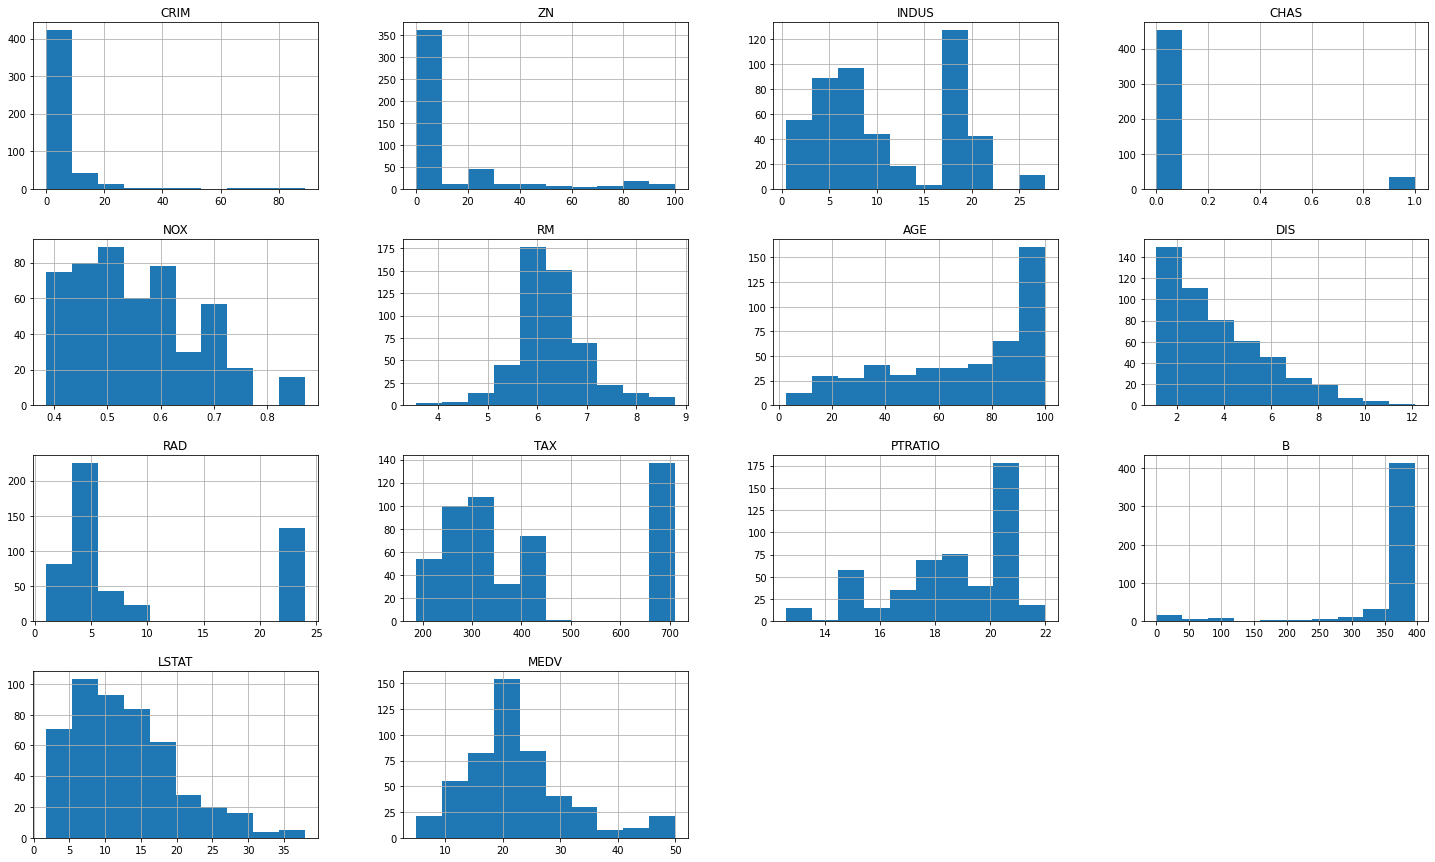

In [5]:
housing.hist(bins=10, figsize=(25,15))
plt.show()

Conclusion: <br>
- Some of the histograms have heavy tailed distribution 

### Presenting correlation between data

<AxesSubplot:>

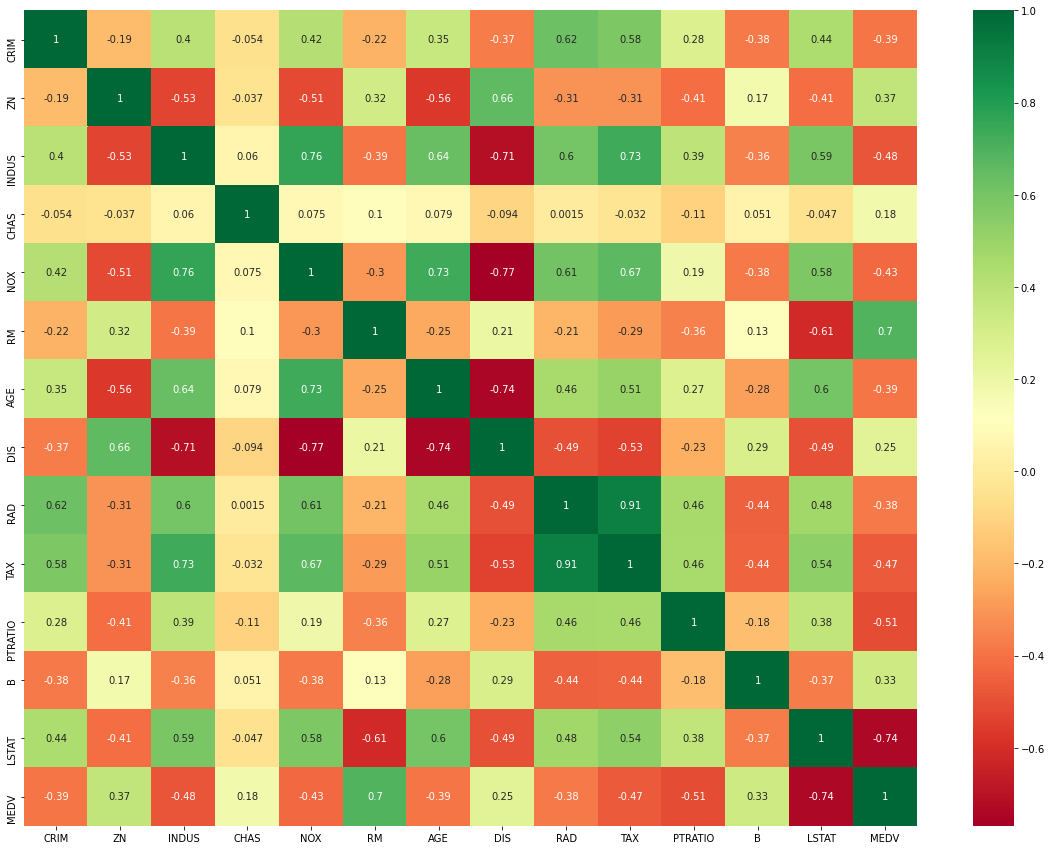

In [6]:
corr = housing.corr()
plt.figure(figsize=(20,15))
sb.heatmap(corr, annot=True, cmap=plt.cm.RdYlGn)

<AxesSubplot:>

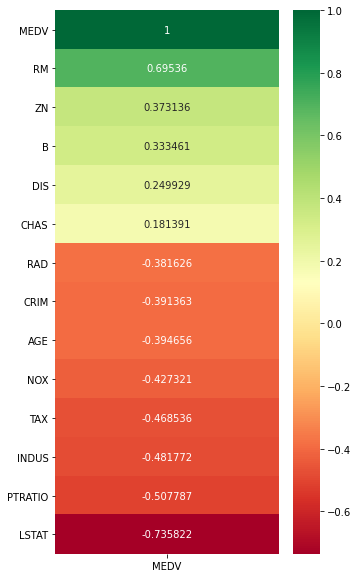

In [7]:
plt.figure(figsize=(5,10))

corr_medv = pd.DataFrame({"MEDV": corr["MEDV"].values}, index=corr["MEDV"].index)
corr_medv.sort_values(['MEDV'], ascending=False, inplace=True)

sb.heatmap(corr_medv, annot=True, fmt='g', cmap = plt.cm.RdYlGn)

### Transforming heavy tailed distribution to be more Gaussian 

In [8]:
new_housing = housing.copy()

In [9]:
heavy_tailed_col = ['CRIM', 'NOX', 'DIS', 'LSTAT']
for col in heavy_tailed_col:
    print(col)
    new_housing[col+'_log'] = np.log(new_housing[col])
    
new_housing.head()

CRIM
NOX
DIS
LSTAT


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_log,NOX_log,DIS_log,LSTAT_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-5.064036,-0.619897,1.408545,1.605430
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-3.600502,-0.757153,1.602836,2.212660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-3.601235,-0.757153,1.602836,1.393766
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-3.430523,-0.780886,1.802073,1.078410
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,-2.672924,-0.780886,1.802073,NaN


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'CRIM_log'}>,
        <AxesSubplot:title={'center':'NOX_log'}>],
       [<AxesSubplot:title={'center':'DIS_log'}>,
        <AxesSubplot:title={'center':'LSTAT_log'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

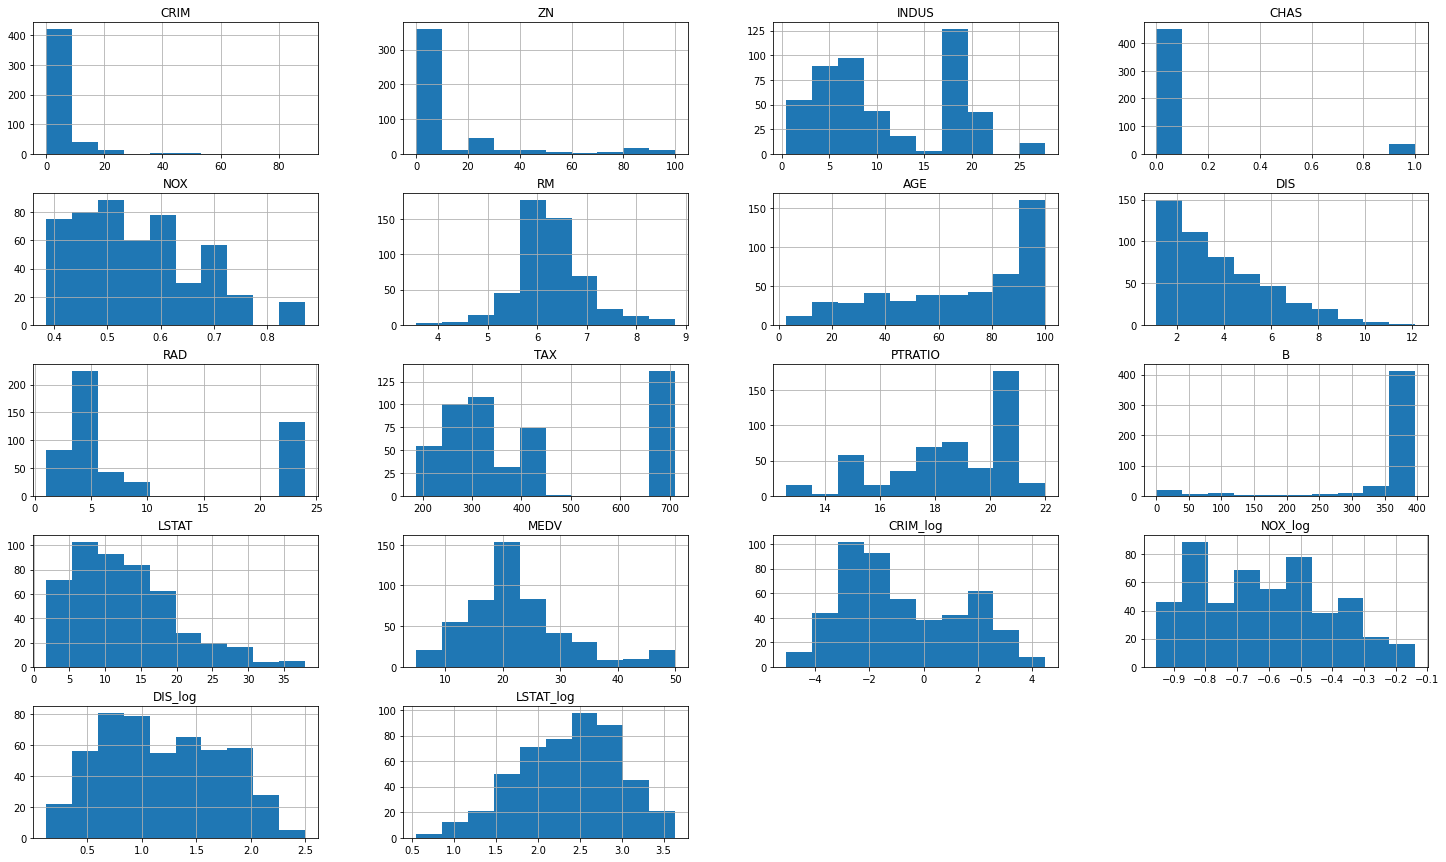

In [10]:
new_housing.hist(bins=10, figsize=(25,15))

<AxesSubplot:>

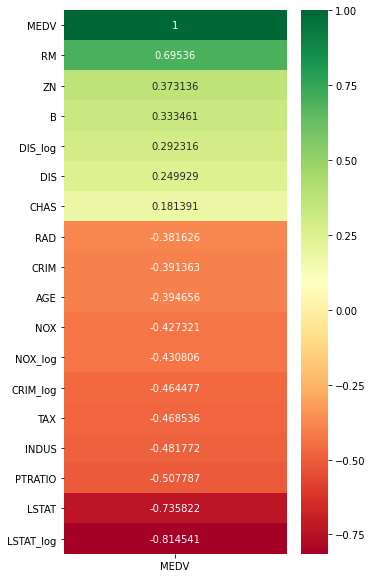

In [11]:
new_corr = new_housing.corr()
plt.figure(figsize=(5,10))
new_corr_medv = pd.DataFrame({"MEDV": new_corr["MEDV"].values}, index=new_corr["MEDV"].index)
new_corr_medv.sort_values(['MEDV'], ascending=False, inplace=True)

sb.heatmap(new_corr_medv, annot=True, fmt='g', cmap = plt.cm.RdYlGn)

Conclusions: <br>
- new features are more correlated than the original 

## 3. Preparing leraning data

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

filled_data = imputer.fit_transform(housing)

housing_tr = pd.DataFrame(filled_data, columns=housing.columns, index=housing.index)

### Splitting data based on the most correlated feature  - "LSTAT"  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT_cut
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,11.43,36.2,3


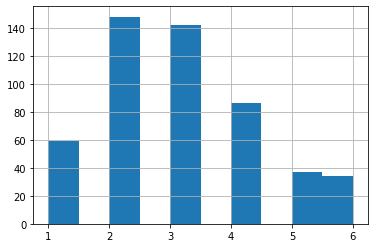

In [13]:
# Categorizing LSTAT into 6 groups
housing_tr['LSTAT_cut'] = pd.cut(housing_tr['LSTAT'], bins=[0, 5, 10, 15, 20, 25, np.inf], labels=[1, 2, 3, 4, 5, 6])
housing_tr['LSTAT_cut'].hist()
housing_tr.head()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_tr, housing_tr['LSTAT_cut']):
    strat_train_set = housing_tr.loc[train_index]
    strat_test_set = housing_tr.loc[test_index]

In [15]:
# checking the distribution of samples 
strat_test_set['LSTAT_cut'].value_counts()/len(strat_test_set)

2    0.294118
3    0.284314
4    0.166667
1    0.117647
6    0.068627
5    0.068627
Name: LSTAT_cut, dtype: float64

In [16]:
# delete the feature "LSTAT_cut" 
for set_ in (strat_train_set, strat_test_set):
    set_.drop('LSTAT_cut', axis=1, inplace=True)

### Creating lables

In [17]:
#lables
y_train = strat_train_set["MEDV"].copy()
# learning data
X_train = strat_train_set.drop("MEDV", axis=1)

### Transforming heavy tailed distribution to be more Gaussian

In [18]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

heavy_tailed_col_names = ['CRIM', 'NOX', 'DIS', 'LSTAT']
heavy_tailed_col_indx = column_index(X_train, heavy_tailed_col_names)
heavy_tailed_col_indx

array([ 0,  4,  7, 12])

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class TransformHeavyTailedData(BaseEstimator, TransformerMixin):
    def __init__(self, column_indx = heavy_tailed_col_indx):
        self.column_indx = column_indx

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for col in self.column_indx:
            X[:,col] = np.log(X[:,col])

        return X
    
   

X_train_copy = X_train.copy()
tr_heavy_tailed = TransformHeavyTailedData(column_indx = heavy_tailed_col_indx)
X_train_copy_tr = tr_heavy_tailed.transform(X_train_copy.values)
X_train_copy_tr_df = pd.DataFrame(X_train_copy_tr, columns=X_train_copy.columns)

## 4. Learning

### Creating pipline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                    ('tr_heavy_tail', TransformHeavyTailedData()),
                    ('std_scaler', StandardScaler()),])

X_train_prepared = pipeline.fit_transform(X_train)

In [40]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Std:', scores.std())

In [45]:
def plot_real_vs_predicted_prices(real, predicted):
    plt.scatter(real, predicted)
    plt.xlabel("Real Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Real vs Predicted prices")

### Linear Regresion 

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)
print("Training Accuracy: ", lin_reg.score(X_train_prepared, y_train)*100)

Training Accuracy:  75.92359613914613


In [38]:
#RMSE
from sklearn.metrics import mean_squared_error

y_predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
print("MEDV range: <", min(housing["MEDV"]),"; " ,max(housing["MEDV"]), ">")
print("RMSE: ", lin_rmse)

MEDV range: < 5.0 ;  50.0 >
RMSE:  4.359174699626579


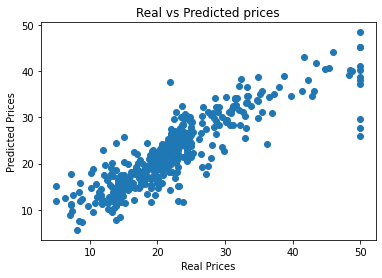

In [46]:
plot_real_vs_predicted_prices(y_train, y_predictions)

In [41]:
# cross validation 
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=10)
cross_lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(cross_lin_rmse_scores)

Scores: [5.26968894 3.5737118  5.53424146 4.00794707 5.11168617 5.03152139
 4.78223635 4.34525385 4.1742779  3.88580623]
Mean: 4.5716371158161415
Std: 0.6288474522514732


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_prepared, y_train)

rf_y_predictions = forest_reg.predict(X_train_prepared)
rf_mse = mean_squared_error(y_train, rf_y_predictions)
rf_rmse = np.sqrt(rf_mse)

rf_scores =cross_val_score(forest_reg, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)  

Scores: [3.48568358 2.23388292 3.54929676 2.31396491 3.79151771 5.72439906
 3.3015578  4.42593172 2.39898366 2.75001243]
Mean: 3.397523054911661
Std: 1.0301326389566263


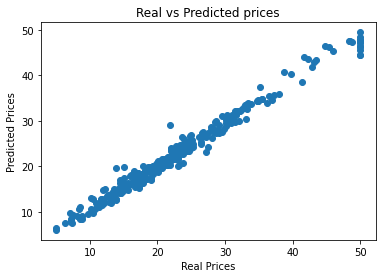

In [47]:
plot_real_vs_predicted_prices(y_train, rf_y_predictions)

 Conclusion: <br>
- the Random Forest model gives better resuts than the Linera

### Random Forest Reagulation

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [54]:
final_model = grid_search.best_estimator_

y_test = strat_test_set['MEDV'].copy()
X_test = strat_test_set.drop("MEDV", axis=1)

X_test_prepared = pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE: ",final_rmse)
print("Accuracy: ", final_model.score(X_test_prepared, y_test)*100)

RMSE:  3.212522526052099
Accuracy:  90.23944916058966


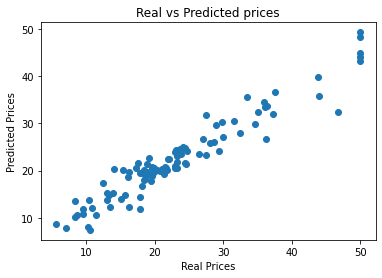

In [53]:
plot_real_vs_predicted_prices(y_test, final_predictions)